## Computer Vision(CS 436, CS5310, EE513) Programming Assignment#2

###  In this part of assignment you'll be determining the intrinsic and extrinsic parameters of a your mobile phone camera using camera calibration techniques. 
### Undergrad students have to strictly follow the handout and implement the procedure outlined in the handout. Grad students can follow the handout and get full marks but they are free to experiment and they can look at other ways of finding the projection matrix but keep in mind that you are not allowed to copy code or pictures, the picture you use for calibration should be your own and should be taken from you own mobile phone camera. You should be able to explain every step of your implementation.
### For this assignment we are using the direct linear transformation method

In [27]:
#Imports
import matplotlib
import cv2
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
import math
%matplotlib notebook

## Part 1 (30 marks for undergrad)
### Take image of a calibration object with your camera phone. Unlike shown in the lecture slides here you are required to choose an appropriate 3D calibration object (i.e. a nonplanar object, a rubiks cube for example) so that the world points on that object span a 3-dimensional space, and the image points are easy to mark. Place the calibration object on a horizontal plane, such as a tabletop, or floor, to take the image. Mark at least 20 image points as carefully as possible and establish their world coordinates in millimeters. 
### From this data, compute the camera matrix P. Show the original points and the back-projected camera points on a single image and compute the average re-projection error.

In [28]:
def making2Rows(x,y,a,b,c):
    return np.array([[a,b,c,1,0,0,0,0,-x*(a), -x*(b), -x*(c), -x], [0,0,0,0,a,b,c,1,-y*(a), -y*(b), -y*(c), -y]])

In [29]:
def calculate_error(first,second):
    return np.sqrt(np.sum(pow(first[0] - second[0],2) + pow(first[1] - second[1],2)))

The error is 3.2109670102068737


<IPython.core.display.Javascript object>


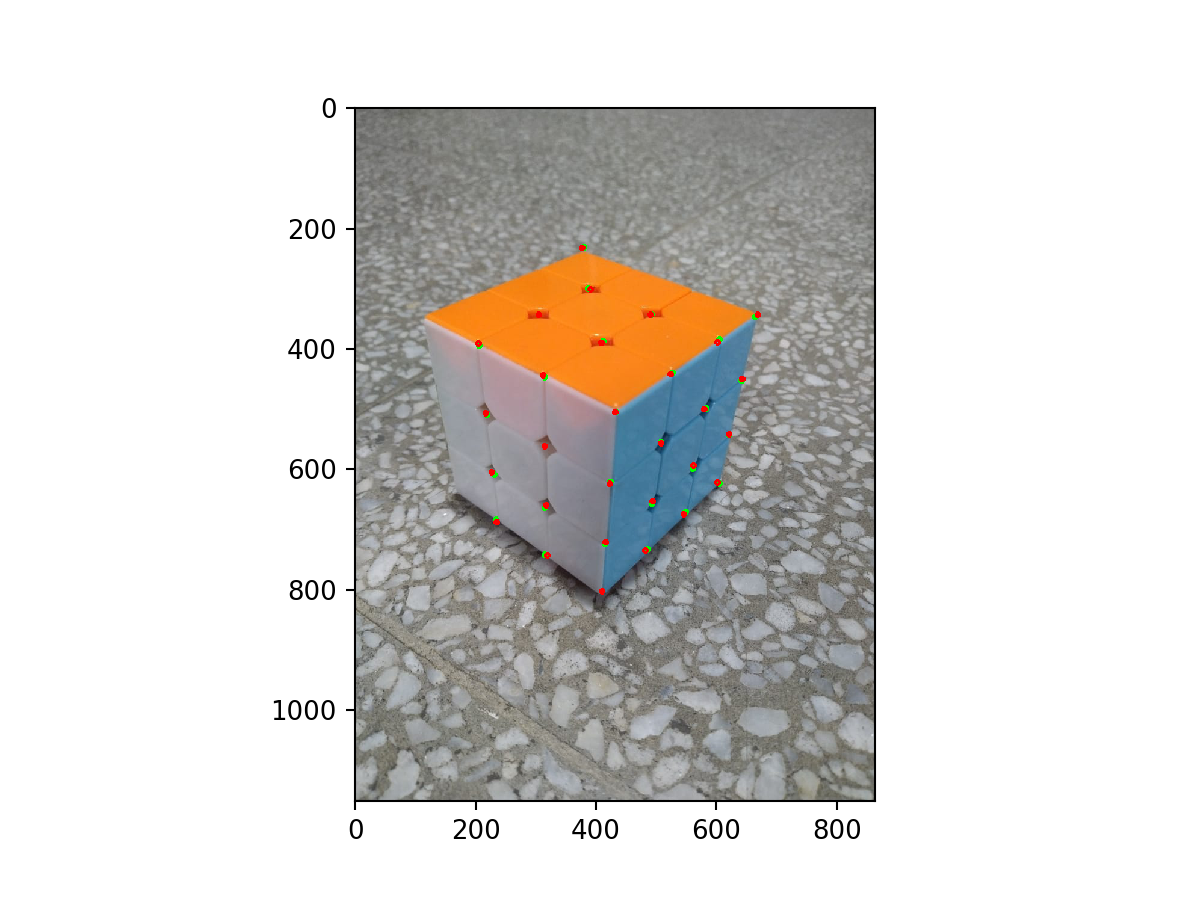

In [30]:
import mpldatacursor

%matplotlib notebook

rubik = np.array(mpimg.imread('rubix.jpeg')) #replace this with your path of image


import mpldatacursor
%matplotlib notebook
rubik_cube = np.array(mpimg.imread('rubix.jpeg')) 

x=18
y=18
z=18

# 20 points
realWorldPoints = np.array([
    [0,0,0,0,18,18,18,18,36,36,36,36,54,54,54,54,54,0,0,0,18,0,0,0,0,0,36,36,18],
    [0,18,36,54,54,36,18,0,0,18,36,54,54,36,18,0,54,36,18,0,54,54,0,18,36,54,54,54,54],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,18,18,18,18,18,36,36,36,36,36,18,36],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
])

# 20 points
pixs = np.array([
    [410,415,424,433,527,508,493,486,549,561,583,605,664,642,621,605,380,315,315,315,412,315,234,231,219,206,387,492,305],
    [803,724,621,505,440,555,658,733,671,599,499,384,347,453,543,624,231,562,664,742,387,447,684,609,510,395,300,343,343],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
])


C = making2Rows(410,803,0,0,0)
C = np.concatenate((C, making2Rows(415,724,0,y,0)), axis=0)
C = np.concatenate((C, making2Rows(424, 621,0,2*y,0)), axis=0)
C = np.concatenate((C, making2Rows(433,505,0,3*y,0)), axis=0)
C = np.concatenate((C, making2Rows(527,440,x,3*y,0)), axis=0)
C = np.concatenate((C, making2Rows(508,555,x,2*y,0)), axis=0)
C = np.concatenate((C, making2Rows(493,658,x,y,0)), axis=0)
C = np.concatenate((C, making2Rows(486,733,x,0,0)), axis=0)
C = np.concatenate((C, making2Rows(549,671,2*x,0,0)), axis=0)
C = np.concatenate((C, making2Rows(561,599,2*x,y,0)), axis=0)
C = np.concatenate((C, making2Rows(583,499,2*x,2*y,0)), axis=0)
C = np.concatenate((C, making2Rows(605,384,2*x,3*y,0)), axis=0)
C = np.concatenate((C, making2Rows(664,347,3*x,3*y,0)), axis=0)
C = np.concatenate((C, making2Rows(642,453,3*x,2*y,0)), axis=0)
C = np.concatenate((C, making2Rows(621,543,3*x,y,0)), axis=0)
C = np.concatenate((C, making2Rows(605,624,3*x,0,0)), axis=0)
C = np.concatenate((C, making2Rows(380,231,3*x,3*y,3*z)), axis=0)
C = np.concatenate((C, making2Rows(315,562,0,2*y,z)), axis=0)
C = np.concatenate((C, making2Rows(315,664,0,y,z)), axis=0)
C = np.concatenate((C, making2Rows(315,742,0,0,z)), axis=0)
################
C = np.concatenate((C, making2Rows(412,387,x,3*y,z)), axis=0)
C = np.concatenate((C, making2Rows(315,447,0,3*y,z)), axis=0)
C = np.concatenate((C, making2Rows(234,684,0,0,2*z)), axis=0)
C = np.concatenate((C, making2Rows(231,609,0,y,2*z)), axis=0)
C = np.concatenate((C, making2Rows(219,510,0,2*y,2*z)), axis=0)
C = np.concatenate((C, making2Rows(206,395,0,3*y,2*z)), axis=0)
C = np.concatenate((C, making2Rows(387,300,2*x,3*y,2*z)), axis=0)
C = np.concatenate((C, making2Rows(492,343,2*x,3*y,z)), axis=0)
C = np.concatenate((C, making2Rows(305,343,x,3*y,2*z)), axis=0)
L = C
############

U, S, V = np.linalg.svd(C)
End_col = V[V.shape[0]-1,:]
C = End_col.reshape((3,4))

################

projected = np.matmul(C,realWorldPoints)
lastCol = projected[-1]
projected = projected/lastCol

error1 = 0
for i in range(29):
    first = (pixs[0][i], pixs[1][i])
    second = (projected[0][i], projected[1][i])
    error = calculate_error(first,second)
    error1 = error1 + error
    
error1 = error1/29
print(f"The error is {error1}")

pixs = pixs.T
projected = np.asarray(projected.T,dtype = int) 

# Real
for point in pixs:
    cv2.circle(rubik_cube,(point[0],point[1]),3,(0,255,0),3)

# Projected
for point in projected:
    cv2.circle(rubik_cube,(point[0],point[1]),3,(255,0,0),3)
    
figure(dpi = 150)
plt.imshow(rubik_cube)
plt.show()


## Part 2 (10 marks)
### Since we are using direct linear transformation, you are required to implement QR decomposition of a matrix

In [31]:
#TODO
def qr_decomposition(C):
    return np.linalg.qr(C)

## Part 3 (30 marks)
### Compute camera center C, intrinsic matrix K and Rotation matrix R. Generate a 3D figure which shows the calibration points, the camera center and the orientation of the camera in 3D (You also have to plot the points for 3d calibration object as well)

Camera center
[[-77.52739344]
 [122.16874106]
 [-55.84790374]
 [  1.        ]]
R matrix
[[-9.87750111e-01 -1.56042268e-01 -7.26930532e-04]
 [ 1.56042607e-01 -9.87750229e-01 -4.36161577e-04]
 [-6.49966158e-04 -5.44250782e-04  9.99999641e-01]]
K Matrix
[[-9.51048831e+02  4.82564273e+01  6.29197895e+02]
 [-0.00000000e+00  1.26269143e+03  3.21680972e+02]
 [-0.00000000e+00 -0.00000000e+00  1.00000000e+00]]

The camera center is marked in blue
The calibration points are marked in red


<IPython.core.display.Javascript object>


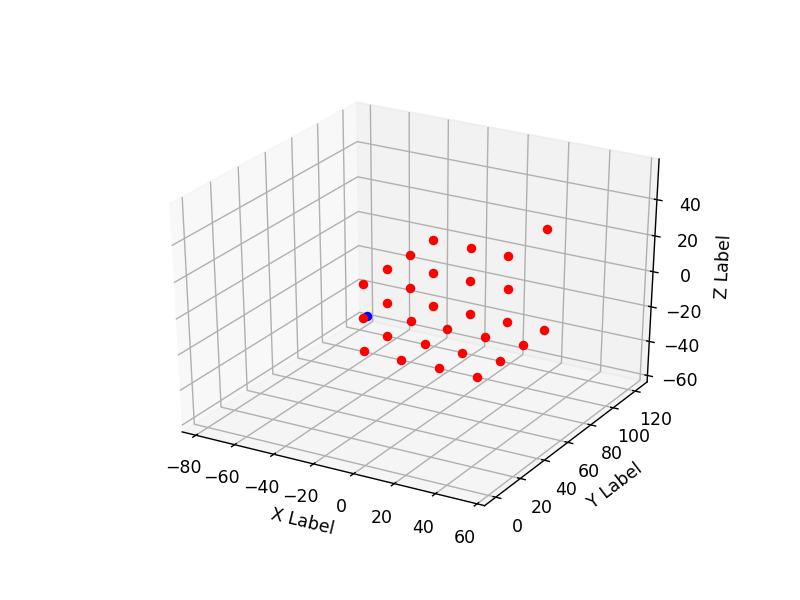

In [32]:
import cv2

U, S, V = np.linalg.svd(C)
# print(V)
End_row = V[V.shape[0]-1,:]
# print(End_row)
P = End_row.reshape((4,1)) 
# print(P[3])
# print("\n\n")

# This would normalize the matrix
P = P/P[-1]
print("Camera center")
print(P)

# print("\n")

# print(C)

K_and_R = np.delete(C, -1, axis=1)
# print("K and R together")
# print(K_and_R)

R, K = qr_decomposition(K_and_R)

# inverse = np.linalg.inv(R)
# transpose = np.transpose(R)

# print(inverse)
# print(transpose)

print("R matrix")
print(R)
K = K/K[2][2]
print("K Matrix")
print(K)
print("\nThe camera center is marked in blue")
print("The calibration points are marked in red")


##############

# print("")
# orientation = C[2]
# orientation = orientation / orientation[-1]
# a, b, c, d = orientation
# xx, yy = np.meshgrid(range(50), range(50))
# xx = xx + P[0] - 25
# yy = yy + P[1] - 25
# n = np.array([a, b, c])
# z = (-a * xx - b * yy -d) * 1. /c
# print(z)
# print("")

##############
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(29):
    xs = realWorldPoints[0][i]
    ys = realWorldPoints[1][i]
    zs = realWorldPoints[2][i]
    ax.scatter(xs, ys, zs, c='red')

ax.scatter(P[0], P[1], P[2],c='blue')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Orientation of the camera still left

## Part 4 (20 marks)
### Search for the sensor information of your camera on the web. From this information, compute the focal length in mm. The following link may be useful to look up sensor sizes in mm(since most smartphone sensor sizes will be quoted in inches):
https://www.digicamdb.com/sensor-sizes/
### now re-plot everything along with the principal point of camera

The focal length fx and fy is -28.61952499958277 26.306071441597314

The principal point is marked in green
The camera center is marked in blue
The calibration points are marked in red


<IPython.core.display.Javascript object>


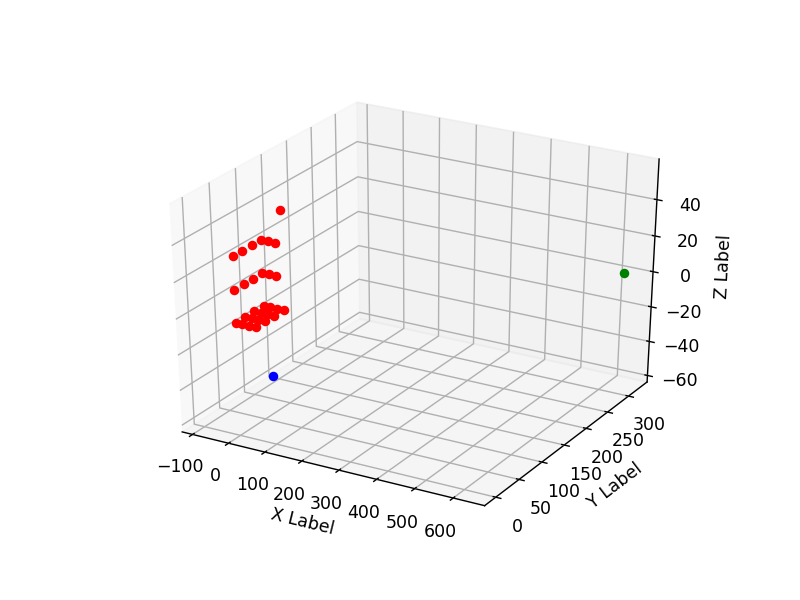

In [33]:
sensor_height = 24
sensor_width = 26

mx = 864/sensor_width
my = 1152/sensor_height 

fx = K[0][0]/mx
fy = K[1][1]/my

print("The focal length fx and fy is",fx,fy)
print("\nThe principal point is marked in green")
print("The camera center is marked in blue")
print("The calibration points are marked in red")


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(29):
    xs = realWorldPoints[0][i]
    ys = realWorldPoints[1][i]
    zs = realWorldPoints[2][i]
    ax.scatter(xs, ys, zs, c='red')

ax.scatter(P[0], P[1], P[2],c='blue')
ax.scatter(K[0][2], K[1][2], K[2][2], c = "green")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


## Part 5 (10 marks)
### Suggest a few ways to minimize the error in this whole procedure. Since you are suggesting these, go back and try repeating/tweaking the whole algorithm and see if the things you suggest actually have an impact on the solution (it is perfectly fine if your propositions are not resulting in anything positive) (Suggest at least 2)

In [34]:
# 1. In order to improve the procedure and minimize the error we can take images from different angles i.e rotating in along 
# x, y and z coordinates and take images from multiple distances from the cube. After repeating the procedure for all the 
# images, we can take an average of the error.

# 2. We manually marked the coordinates in the image. Edge detection could be applied to the image to mark the points and reduce
# error.

# 3. Instead of using a rubiks cube which might have variations in the lengths of the smaller cubes we could use a chess board
# which has fixed size squares. This could enable us to mark the coordinates much more accurately as we know the exacts points 
# where the cells end as compared to the rubix cube where we had to estimate the part where one cell ended and another started.

## Part 6 (Grad Only, 20 marks for this part)(Upto 10 marks bonus for Undergrads)
### Look up the existing ways of camera calibration and draw a comparisons between the one you've implemented above. While comparing the two algorithms, you should be able the explain the computation/space complexity of the two algorithms, the assumptions that are kept in both algorithms and under what circumstances each would fail. You should also explain the equations involved in both algorithms.
### In case you have opted for not following the handout (i.e looking up and implementing your own algo) you can draw comparison between the algorithm that you've written and the one proposed in the handout (DLT)